In [ ]:
#%config Completer.use_jedi = False

In [ ]:
import pandas as pd
import numpy as np

###### Loading   and exploring data, spanish is the original language of dataset

In [ ]:
properties = pd.read_excel('outputs/propiedades_pasto_11_05_21_3.xlsx',engine='openpyxl', index_col=0)

In [ ]:
properties.head(4)

,url,coordinates,v_coordinate_x,v_coordinate_y,type,v_type,price,v_price,size,v_size,v_rooms,v_baths,description
0,https://www.properati.com.co/detalle/2a2oj_ven...,"['1.205884', '-77.285787']",1.205884,-77.285787,Apartamento en venta en Pasto,Apartamento,$ 145.000.000,145000000.0,93 m²,93.0,3.0,2.0,<div><b>vendo apartamento balcones de la prade...
1,https://www.properati.com.co/detalle/29wn6_ven...,"['1.205884', '-77.285787']",1.205884,-77.285787,Casa en venta en Pasto,Casa,$ 460.000.000,460000000.0,813 m²,813.0,5.0,3.0,<div><b>vendo casa centro de pasto</b><br><br>...
2,https://www.properati.com.co/detalle/2avck_ven...,"['1.205884', '-77.285787']",1.205884,-77.285787,Flat en venta en Pasto,Flat,$ 560.000.000,560000000.0,170 m²,170.0,3.0,3.0,<div><b>Vendo apartamento sector Unicentro Pas...
3,https://www.properati.com.co/detalle/2bjej_ven...,"['1.212983', '-77.280906']",1.212983,-77.280906,Apartamento en venta en Pasto,Apartamento,$ 275.000.000,275000000.0,72 m²,72.0,3.0,2.0,<div><b>vendo apartamento central 72 mts</b><b...


In [ ]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             203 non-null    object 
 1   coordinates     172 non-null    object 
 2   v_coordinate_x  172 non-null    float64
 3   v_coordinate_y  172 non-null    float64
 4   type            203 non-null    object 
 5   v_type          203 non-null    object 
 6   price           196 non-null    object 
 7   v_price         196 non-null    float64
 8   size            86 non-null     object 
 9   v_size          86 non-null     float64
 10  v_rooms         175 non-null    float64
 11  v_baths         182 non-null    float64
 12  description     203 non-null    object 
dtypes: float64(6), object(7)
memory usage: 22.2+ KB


In [ ]:
properties.describe()

,v_coordinate_x,v_coordinate_y,v_price,v_size,v_rooms,v_baths
count,172.000000,172.000000,1.960000e+02,86.000000,175.000000,182.000000
mean,1.220388,-77.282297,3.778748e+08,545.139535,3.640000,2.642857
std,0.035763,0.014842,2.664438e+08,1714.968559,1.909324,1.055859
min,1.161666,-77.346497,2.500000e+07,22.000000,2.000000,1.000000
25%,1.208439,-77.287504,1.968945e+08,77.250000,3.000000,2.000000
50%,1.218346,-77.284523,3.200000e+08,105.000000,3.000000,2.000000
75%,1.226978,-77.280775,4.800000e+08,173.750000,4.000000,3.000000
max,1.656387,-77.155987,2.000000e+09,10200.000000,20.000000,6.000000


In [ ]:
apartments = properties.where(properties['v_type'] == "Apartamento").dropna(subset=['v_coordinate_x','v_coordinate_y']).reset_index().drop(columns='index')
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             109 non-null    object 
 1   coordinates     109 non-null    object 
 2   v_coordinate_x  109 non-null    float64
 3   v_coordinate_y  109 non-null    float64
 4   type            109 non-null    object 
 5   v_type          109 non-null    object 
 6   price           105 non-null    object 
 7   v_price         105 non-null    float64
 8   size            39 non-null     object 
 9   v_size          39 non-null     float64
 10  v_rooms         102 non-null    float64
 11  v_baths         104 non-null    float64
 12  description     109 non-null    object 
dtypes: float64(6), object(7)
memory usage: 11.2+ KB


In [ ]:
apartments[~apartments['v_size'].notnull()]

,url,coordinates,v_coordinate_x,v_coordinate_y,type,v_type,price,v_price,size,v_size,v_rooms,v_baths,description
12,https://www.properati.com.co/detalle/28cez_ven...,"['1.231144', '-77.284245']",1.231144,-77.284245,Apartamento en venta en comuna 9-nariÑo,Apartamento,$ 473.390.368,473390368.0,NaN,NaN,4.0,5.0,<div>815-1001 D.C Colombia S.A.S Vende Apartam...
13,https://www.properati.com.co/detalle/28cev_ven...,"['1.211675', '-77.260476']",1.211675,-77.260476,Apartamento en venta en comuna 12-nariÑo,Apartamento,$ 142.056.040,142056040.0,NaN,NaN,3.0,3.0,<div>815-1006 D.C Colombia S.A.S vende Apartam...
14,https://www.properati.com.co/detalle/24elz_ven...,"['1.226415', '-77.285719']",1.226415,-77.285719,Apartamento en venta en comuna 9-nariÑo,Apartamento,$ 270.000.000,270000000.0,NaN,NaN,3.0,3.0,<div>En venta Moderno apartamento interior en ...
18,https://www.properati.com.co/detalle/2a2j5_ven...,"['1.219655', '-77.286468']",1.219655,-77.286468,Apartamento en venta en comuna 7-nariÑo,Apartamento,$ 300.000.000,300000000.0,NaN,NaN,2.0,2.0,<div>En venta bello y acogedor apto en San Ign...
19,https://www.properati.com.co/detalle/2blg3_ven...,"['1.216516', '-77.268777']",1.216516,-77.268777,Apartamento en venta en comuna 12-nariÑo,Apartamento,$ 140.000.000,140000000.0,NaN,NaN,2.0,1.0,<div>Se vende apartamento para estrenar en tor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,https://www.properati.com.co/detalle/1goq7_ven...,"['1.215741', '-77.274103']",1.215741,-77.274103,Apartamento en venta en Pasto,Apartamento,NaN,NaN,NaN,NaN,5.0,3.0,<div>apartamento apartamento centro</div>
105,https://www.properati.com.co/detalle/1e4f3_ven...,"['1.218428', '-77.291952']",1.218428,-77.291952,Apartamento en venta en Pasto,Apartamento,NaN,NaN,NaN,NaN,3.0,2.0,<div>Vendo espectacular apartamento en condomi...
106,https://www.properati.com.co/detalle/18x1l_ven...,"['1.224925', '-77.285312']",1.224925,-77.285312,Apartamento en venta en Pasto,Apartamento,$ 250.000.000,250000000.0,NaN,NaN,3.0,2.0,<div>Apartamento en venta sec maridiaz pasto e...
107,https://www.properati.com.co/detalle/2b7q1_ven...,"['1.205884', '-77.285787']",1.205884,-77.285787,Apartamento en venta en Pasto,Apartamento,$ 150.000.000,150000000.0,NaN,NaN,2.0,NaN,<div><b>SE VENDE APARTAMENTO SECTOR PARQUE BOL...


In [ ]:
sub_apartments =  apartments[["v_price","v_size"]].dropna()
sub_apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 147
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   v_price  38 non-null     float64
 1   v_size   38 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


We can see, just a few apartments have information about size, we are going to explore "price" and "size" dimensions to view a possible solution to complement the null values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

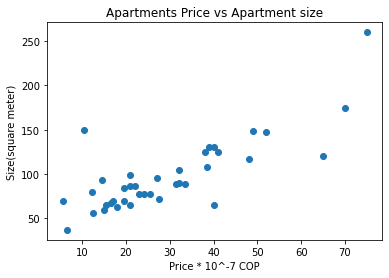

We can see something like a linear correlation between both variables


In [ ]:
plt.figure()
plt.scatter(sub_apartments.v_price/10000000,sub_apartments.v_size)
plt.title("Apartments Price vs Apartment size")
plt.xlabel("Price * 10^-7 COP")
plt.ylabel("Size(square meter)")
plt.show()
print("We can see something like a linear correlation between both variables")

In [ ]:
sub_apartments.corr()

,v_price,v_size
v_price,1.000000,0.789493
v_size,0.789493,1.000000


0.78 is a strong positive correlation, we are going to try a linear regression between both variables

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split((sub_apartments['v_price']/10000000), sub_apartments['v_size'],test_size=0.2)
X_train = np.array(X_train).reshape(len(X_train),1)
X_test = np.array(X_test).reshape(len(X_test),1)
y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

In [ ]:
from sklearn.linear_model import LinearRegressiongression

In [ ]:
reg = LinearRegression()
reg = reg.fit(X_train,y_train)

In [ ]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(np.array(X_test).reshape(len(X_test),1))

In [ ]:
#Now we see if our results are trustworthy
def kpi_ML(y_train, y_train_pred, y_test, y_test_pred, name=''):
    
    df = pd.DataFrame(columns=['MAE','RMSE','Bias'], index=['Train','Test'])
    df.index.name = name
    df.loc['Train','MAE'] = 100*np.mean(abs(y_train - y_train_pred))/np.mean(y_train)
    df.loc['Train','RMSE'] = 100*np.sqrt(np.mean((y_train - y_train_pred)**2))/np.mean(y_train)
    df.loc['Train','Bias'] = 100*np.mean((y_train - y_train_pred))/np.mean(y_train)
    df.loc['Test','MAE'] = 100*np.mean(abs(y_test - y_test_pred))/np.mean(y_test)
    df.loc['Test','RMSE'] = 100*np.sqrt(np.mean((y_test - y_test_pred)**2))/np.mean(y_test)
    df.loc['Test','Bias'] =  100*np.mean((y_test - y_test_pred))/np.mean(y_test)
    df = df.astype(float).round(1)
    print(df)

In [ ]:
kpi_ML(y_train, y_train_pred, y_test, y_test_pred, name='Linear Regression')

                    MAE  RMSE  Bias
Linear Regression                  
Train              14.8  21.7   0.0
Test               23.1  38.4  13.7


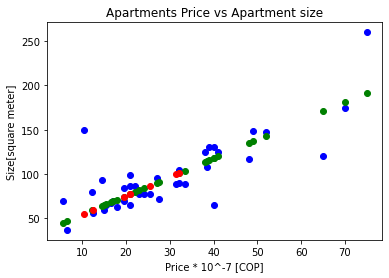

In [ ]:
plt.figure()
plt.scatter(sub_apartments.v_price/10000000,sub_apartments.v_size, c='blue')
plt.scatter(X_train,y_train_pred, c='green')
plt.scatter(X_test,y_test_pred, c='red')
plt.title("Apartments Price vs Apartment size")
plt.xlabel("Price * 10^-7 [COP]")
plt.ylabel("Size[square meter]")
plt.show()

In [ ]:
X = (sub_apartments['v_price']/10000000)
y = sub_apartments['v_size']
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
R_sq = reg.score(X,y)
print('This model explains {}% of real variable'.format(round(R_sq*100,2)))

This model explains 61.22% of real variable


###### As we can see, this model has some KPI far from been perfect, but are acceptable to apply to our dataset apartment sizes

In [ ]:
apartments_new = apartments.copy()
apartments_new = apartments_new.dropna(subset=['v_price']).reset_index()

In [ ]:
indexes =  apartments_new[~apartments_new['v_size'].notnull()].index.to_list()
for row in indexes:
    price = apartments_new.loc[row,'v_price']/10000000
    size = reg.predict(np.array(price).reshape(-1,1))
    apartments_new.loc[row,'v_size'] = size[0][0]
apartments_new.drop(columns=['index'])

In [ ]:
apartments_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           105 non-null    int64  
 1   url             105 non-null    object 
 2   coordinates     105 non-null    object 
 3   v_coordinate_x  105 non-null    float64
 4   v_coordinate_y  105 non-null    float64
 5   type            105 non-null    object 
 6   v_type          105 non-null    object 
 7   price           105 non-null    object 
 8   v_price         105 non-null    float64
 9   size            38 non-null     object 
 10  v_size          105 non-null    float64
 11  v_rooms         98 non-null     float64
 12  v_baths         100 non-null    float64
 13  description     105 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 11.6+ KB


In [ ]:
apartments_new['v_price_red'] = apartments_new['v_price']/10000000

Now we have an almost full dataset, and we are going to clusterize our apartments, before data normalization

In [ ]:
apartments_new.columns

Index(['index', 'url', 'coordinates', 'v_coordinate_x', 'v_coordinate_y',
       'type', 'v_type', 'price', 'v_price', 'size', 'v_size', 'v_rooms',
       'v_baths', 'description', 'v_price_red'],
      dtype='object')

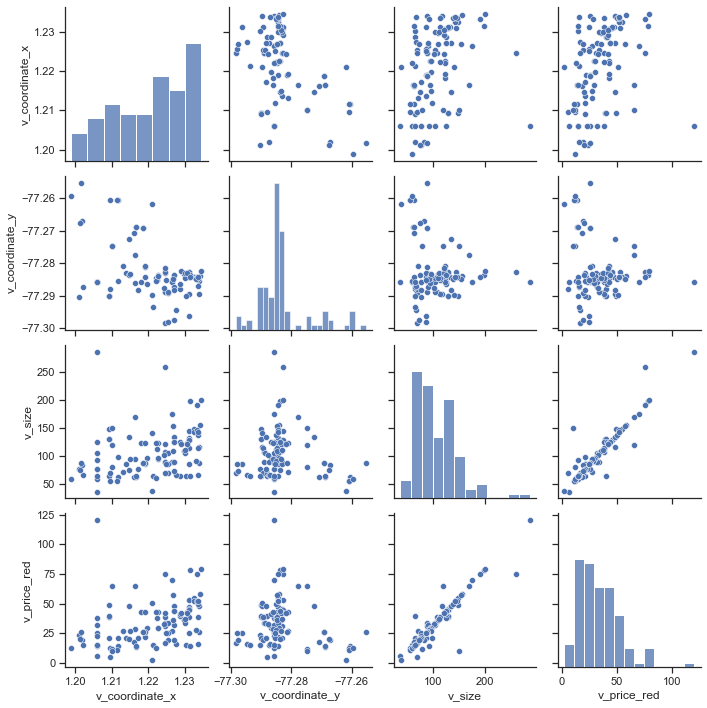

In [ ]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(apartments_new, vars=['v_coordinate_x', 'v_coordinate_y', 'v_size', 'v_price_red'])
plt.show()

In [ ]:
def scaler(df):
    mean = df.mean(axis=0)
    maxi = df.max(axis=0)
    mini = df.min(axis=0)
    df_norm = pd.DataFrame()
    df_norm = df.subtract(mean,axis=1)
    df_norm = df_norm.divide(maxi-mini,axis=1).fillna(0)
    return df_norm    

In [ ]:
apartments_new[['v_coordinate_x', 'v_coordinate_y', 'v_size',
                'v_rooms', 'v_baths', 'v_price_red']].dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 104
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   v_coordinate_x  96 non-null     float64
 1   v_coordinate_y  96 non-null     float64
 2   v_size          96 non-null     float64
 3   v_rooms         96 non-null     float64
 4   v_baths         96 non-null     float64
 5   v_price_red     96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [ ]:
apartments_norm = scaler(apartments_new[['v_coordinate_x', 'v_coordinate_y', 'v_size',
                                        'v_rooms', 'v_baths', 'v_price_red']].dropna())

<AxesSubplot:>

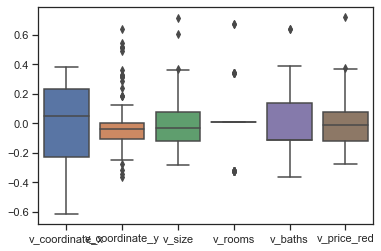

In [ ]:
sns.boxplot(data = apartments_norm)

In [ ]:
apartments_norm.columns

Index(['v_coordinate_x', 'v_coordinate_y', 'v_size', 'v_rooms', 'v_baths',
       'v_price_red'],
      dtype='object')

#### CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

##### KMEANS

###### Inertia

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='Number of clusters'>

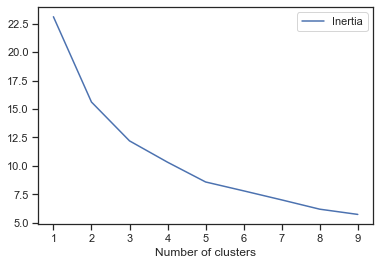

In [ ]:
results = []
for n in range(1,10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(apartments_norm)
    results.append([n,kmeans.inertia_])
results = pd.DataFrame(data=results,columns=['Number of clusters','Inertia']).set_index('Number of clusters')
results.plot()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(apartments_norm)
r_group = kmeans.predict(apartments_norm)
r_group = pd.Series(data=r_group, index=apartments_norm.index)
r_group

0      2
1      2
2      3
3      2
4      2
      ..
98     1
99     1
100    1
102    3
104    3
Length: 96, dtype: int32

In [ ]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                       columns=['v_coordinate_x', 'v_coordinate_y', 'v_size', 'v_rooms', 'v_baths', 'v_price_red'])
centers

,v_coordinate_x,v_coordinate_y,v_size,v_rooms,v_baths,v_price_red
0,0.234124,-0.031792,0.122398,0.023750,0.138021,0.128563
1,-0.255610,0.411288,-0.157746,-0.015224,-0.131210,-0.160438
2,-0.355802,-0.069416,-0.080963,-0.107230,-0.126685,-0.113221
3,0.144093,-0.110210,-0.063828,-0.043347,-0.103915,-0.047921
4,-0.094843,0.004465,0.234579,0.277083,0.363021,0.228194


In [ ]:
apartments_new['KM_Group'] = r_group

In [ ]:
apartments_new.groupby("KM_Group").mean()

,index,v_coordinate_x,v_coordinate_y,v_price,v_size,v_rooms,v_baths,v_price_red
KM_Group,,,,,,,,
0.0,63.600000,1.229122,-77.284199,5.002720e+08,138.615303,3.040000,3.000000,50.027200
1.0,54.076923,1.211716,-77.265163,1.606966e+08,68.598682,2.923077,1.923077,16.069662
2.0,24.058824,1.208156,-77.285815,2.161765e+08,87.789115,2.647059,1.941176,21.617647
3.0,50.806452,1.225922,-77.287568,2.929032e+08,92.071872,2.838710,2.032258,29.290323
4.0,43.300000,1.217430,-77.282641,6.173390e+08,166.652968,3.800000,3.900000,61.733904


In [ ]:
apartments_new.groupby("KM_Group").median()

,index,v_coordinate_x,v_coordinate_y,v_price,v_size,v_rooms,v_baths,v_price_red
KM_Group,,,,,,,,
0.0,71.0,1.230581,-77.284192,455000000.0,128.649042,3.0,3.0,45.500000
1.0,43.0,1.211675,-77.267208,142056040.0,63.212297,3.0,2.0,14.205604
2.0,15.0,1.209131,-77.285787,210000000.0,78.000000,3.0,2.0,21.000000
3.0,52.0,1.225295,-77.286468,300000000.0,90.000000,3.0,2.0,30.000000
4.0,42.5,1.215666,-77.283851,580000000.0,145.009889,4.0,4.0,58.000000


In [ ]:
apartments_new[apartments_new['KM_Group'].isnull()]

,index,url,coordinates,v_coordinate_x,v_coordinate_y,type,v_type,price,v_price,size,v_size,v_rooms,v_baths,description,v_price_red,KM_Group
36,36,https://www.properati.com.co/detalle/24sgm_ven...,"['1.205884', '-77.285787']",1.205884,-77.285787,Apartamento en venta en Pasto,Apartamento,$ 320.000.000,320000000.0,105 m²,105.000000,3.0,NaN,<div><b>SE VENDE AMPLIO APARTAMENTO SECTOR SAN...,32.0,NaN
57,57,https://www.properati.com.co/detalle/1i1lv_ven...,"['1.222094', '-77.285514']",1.222094,-77.285514,Apartamento en venta en Pasto,Apartamento,$ 130.000.000,130000000.0,NaN,60.662860,NaN,1.0,<div>APARTAESTUDIO UBICADO EN EL MEJOR SECTOR ...,13.0,NaN
88,88,https://www.properati.com.co/detalle/1b5un_ven...,"['1.21628', '-77.285986']",1.216280,-77.285986,Apartamento en venta en Pasto,Apartamento,$ 290.000.000,290000000.0,NaN,94.497352,NaN,3.0,<div>DE OPORTUNIDAD Se vende Hermoso apartamen...,29.0,NaN
91,91,https://www.properati.com.co/detalle/1gpr0_ven...,"['1.201252', '-77.267522']",1.201252,-77.267522,Apartamento en venta en Pasto,Apartamento,$ 200.000.000,200000000.0,NaN,75.465450,NaN,2.0,<div>El Apartamento queda en Torres de Malaga ...,20.0,NaN
92,92,https://www.properati.com.co/detalle/1b5uo_ven...,"['1.231463', '-77.284243']",1.231463,-77.284243,Apartamento en venta en Pasto,Apartamento,$ 145.000.000,145000000.0,NaN,63.834844,NaN,NaN,<div>Confortable apartaestudio en tercer piso ...,14.5,NaN
96,96,https://www.properati.com.co/detalle/1bpr1_ven...,"['1.233678', '-77.28708']",1.233678,-77.287080,Apartamento en venta en Pasto,Apartamento,$ 160.000.000,160000000.0,NaN,67.006827,NaN,NaN,<div>Apartamento recien amoblado sector norte ...,16.0,NaN
97,97,https://www.properati.com.co/detalle/1b5uh_ven...,"['1.233592', '-77.284355']",1.233592,-77.284355,Apartamento en venta en Pasto,Apartamento,$ 520.000.000,520000000.0,NaN,143.134434,NaN,NaN,<div>Se vende un espectacular apartamento en e...,52.0,NaN
101,102,https://www.properati.com.co/detalle/17e38_ven...,"['1.225445', '-77.298017']",1.225445,-77.298017,Apartamento en venta en Pasto,Apartamento,$ 250.000.000,250000000.0,NaN,86.038729,NaN,2.0,<div>SE VENDE APARTAMENTOS PARA ESTRENAR EN ED...,25.0,NaN
103,107,https://www.properati.com.co/detalle/2b7q1_ven...,"['1.205884', '-77.285787']",1.205884,-77.285787,Apartamento en venta en Pasto,Apartamento,$ 150.000.000,150000000.0,NaN,64.892171,2.0,NaN,<div><b>SE VENDE APARTAMENTO SECTOR PARQUE BOL...,15.0,NaN


In [ ]:
apartments_new['KM_Group'].value_counts()

3.0    31
0.0    25
2.0    17
1.0    13
4.0    10
Name: KM_Group, dtype: int64

In [ ]:
# New File with the information to upload to Tableau
apartments_new[['url','coordinates','v_coordinate_x', 'v_coordinate_y', 'v_price','v_size', 'v_rooms', 'v_baths','KM_Group']].to_csv('outputs/apartments_clust0.csv')